In [37]:
parPercents=[83.8202, 84.1504, 84.4806, 84.8108, 85.1410, 85.4712, 85.8014, 86.1316, 86.4816, 86.7920, 87.1222, 87.4524, 87.7826, 88.1128, 88.4430]
superfluousPercents=list(range(2, 31, 2))
egPercents=[100-par for par in parPercents]
egPercents

[16.1798,
 15.849599999999995,
 15.519400000000005,
 15.1892,
 14.858999999999995,
 14.528800000000004,
 14.198599999999999,
 13.868399999999994,
 13.5184,
 13.207999999999998,
 12.877799999999993,
 12.547600000000003,
 12.217399999999998,
 11.887200000000007,
 11.557000000000002]

In [38]:
(5.5/807.51)/((5.5/807.51)+(31)/914)

0.16723325929205807

In [39]:
nonsuperfluousPar=[par-sup for par, sup in zip(parPercents, superfluousPercents)]
nonsuperfluousEGPer=[egPer/(egPer+nonSupPar) for egPer, nonSupPar in zip(egPercents, nonsuperfluousPar)]

In [40]:
nonsuperfluousEGPer

[0.1651,
 0.16509999999999994,
 0.16510000000000005,
 0.1651,
 0.16509999999999994,
 0.16510000000000005,
 0.1651,
 0.16509999999999994,
 0.16485853658536584,
 0.16509999999999997,
 0.1650999999999999,
 0.16510000000000002,
 0.16509999999999997,
 0.1651000000000001,
 0.16510000000000002]

(15, 15)

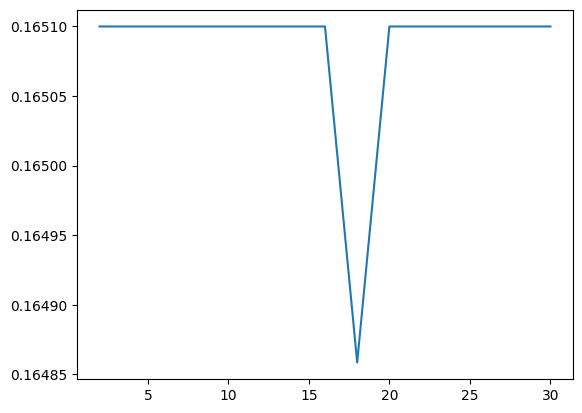

In [41]:
import matplotlib.pyplot as plt
plt.plot(superfluousPercents, nonsuperfluousEGPer)
len(superfluousPercents), len(nonsuperfluousEGPer)

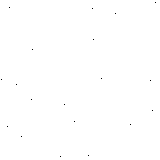

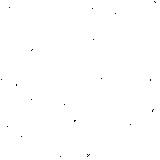

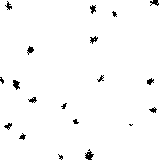

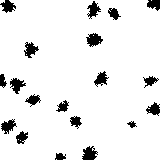

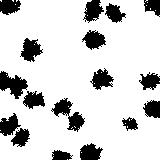

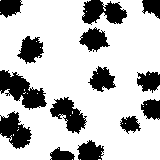

In [45]:
absorptionRate=.1651
import random
import torch
import torchvision as tv
from collections import deque

grid=torch.rand((160, 160))
grid

tensorToImageTransform=tv.transforms.ToPILImage()

def corePhase(grid, prob=0.05):
    return (grid>prob).float()

grid=corePhase(grid, 0.001)
display(tensorToImageTransform(grid))

tensorToImageTransform(grid)
# def growthPhase(grid, prob, endingWt):
#     idxs=torch.nonzero(grid==0)
#     if (grid.shape[0]*grid.shape[1]-len(idxs))/(grid.shape[0]*grid.shape[1])<endingWt:
#         return False
#     dirs=[[0,1],[0,-1],[1,1],[1,-1],[1,0],[-1,1],[-1,-1],[-1,0]]
#     for [i,j] in idxs:
#         for [x,y] in dirs:
#             if  max(1,(x*y!=0)*4)*random.random()<prob and 0<=i+x<grid.shape[0] and 0<=j+y<grid.shape[1]:
#                 grid[i+x, j+y]=0
#     return True

# Growth Phase with Directional Bias
def growthPhase(grid, prob, endingWt, direction_bias=0.2):
    idxs = torch.nonzero(grid == 0)
    current_weight = (grid.shape[0] * grid.shape[1] - len(idxs)) / (grid.shape[0] * grid.shape[1])
    
    if current_weight < endingWt:
        return False
    
    dirs = [[0,1], [0,-1], [1,0], [-1,0], [1,1], [1,-1], [-1,1], [-1,-1]]
    
    for [i, j] in idxs:
        for [dx, dy] in dirs:
            bias_factor = direction_bias if abs(dx) != abs(dy) else 1  # Favor straight directions
            if random.random() < prob * bias_factor and 0 <= i + dx < grid.shape[0] and 0 <= j + dy < grid.shape[1]:
                grid[i + dx, j + dy] = 0  # Grow "worm" in biased direction
    return True

i=0


# grid=grow(grid, 0.075, 0.60)

while growthPhase(grid, 0.075, 0.75, 1):
    if i%10==0:
        display(tensorToImageTransform(grid))
    i+=1
display(tensorToImageTransform(grid))

[deque([[140, 91]]), deque([[68, 118]]), deque([[103, 27]]), deque([[12, 101]]), deque([[32, 25]]), deque([[58, 118]]), deque([[10, 71]]), deque([[139, 129]]), deque([[65, 60]]), deque([[29, 78]]), deque([[38, 62]]), deque([[6, 35]]), deque([[149, 23]]), deque([[152, 120]]), deque([[15, 91]]), deque([[145, 79]]), deque([[53, 52]]), deque([[85, 24]]), deque([[141, 52]]), deque([[65, 74]]), deque([[53, 46]]), deque([[126, 134]]), deque([[22, 145]]), deque([[148, 57]]), deque([[109, 115]]), deque([[8, 70]]), deque([[19, 10]]), deque([[23, 146]]), deque([[8, 93]]), deque([[76, 78]]), deque([[123, 24]]), deque([[45, 97]]), deque([[87, 106]]), deque([[107, 49]]), deque([[76, 9]]), deque([[57, 33]]), deque([[140, 121]]), deque([[144, 11]]), deque([[149, 142]]), deque([[143, 61]])]
[[0.00540909090909091, 0.05218181818181818, 0.003363636363636364, 0.023863636363636365], [0.07205056179775281, 0.008389513108614233, 0.010561797752808988, 0.041666666666666664], [0.0341588785046729, 0.00140186915887

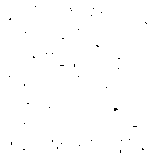

0.996875


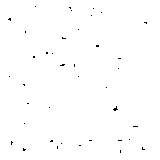

0.995078125


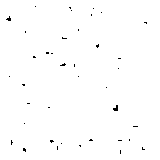

0.993203125


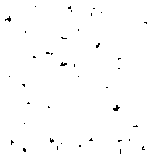

0.99109375


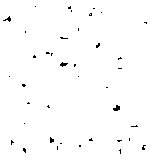

0.9883203125


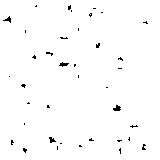

0.98421875


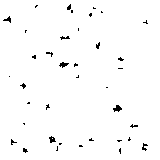

0.9791796875


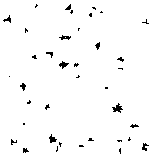

0.974609375


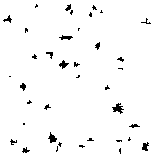

0.9694921875


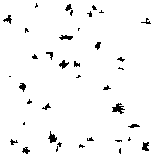

0.9626953125


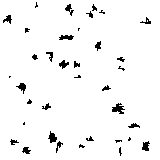

0.956171875


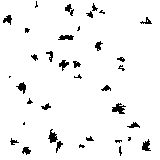

0.948671875


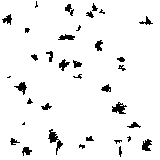

0.94015625


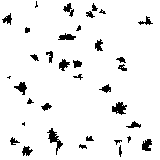

0.9311328125


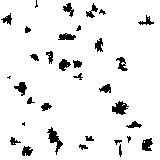

0.922265625


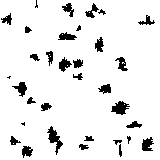

0.912734375


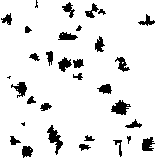

0.9017578125


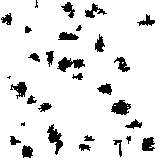

0.89125


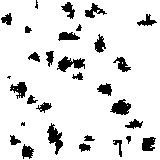

0.878515625


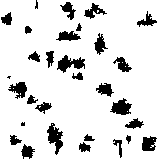

0.8658203125


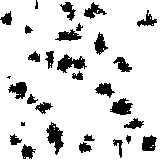

0.854453125


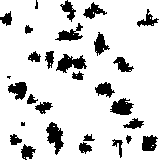

0.8409375


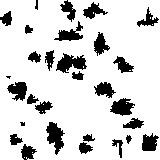

0.8264453125


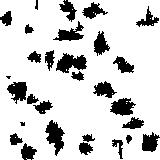

0.81171875


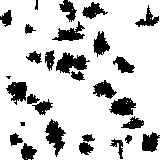

0.7973046875


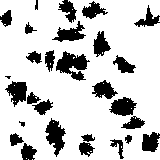

0.7801171875


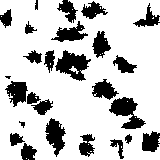

0.76359375


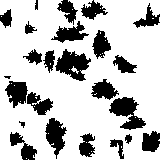

0.746171875


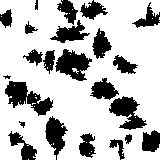

0.7300390625


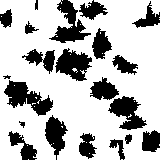

0.7125390625


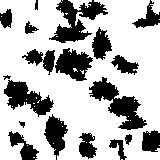

0.69578125


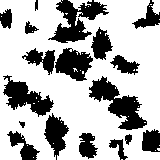

0.6768359375


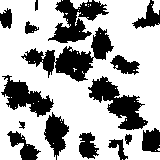

0.65796875


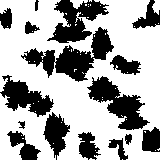

0.63953125


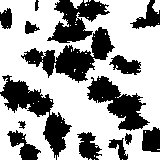

0.619765625


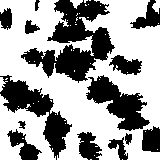

0.6009375


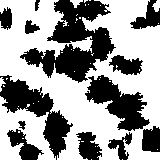

0.58171875


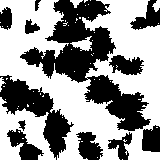

0.563359375


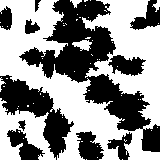

0.545859375


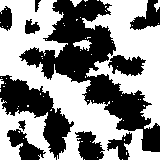

0.5284375


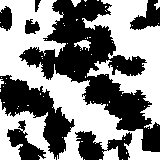

0.51015625


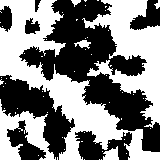

0.4918359375


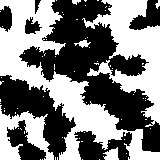

0.4740625


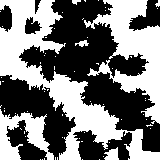

0.457578125


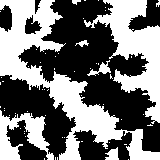

0.441796875


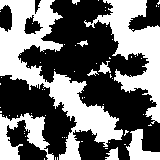

0.425390625


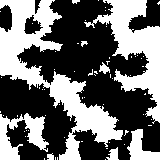

0.408359375


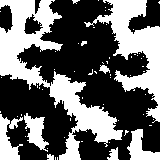

0.3928125


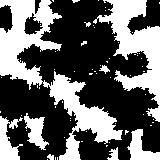

0.3771484375


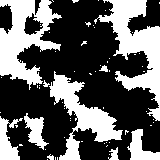

0.36234375


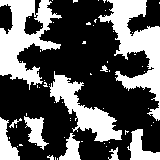

0.3462109375


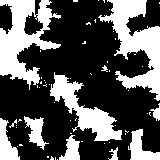

0.3320703125


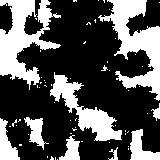

0.3192578125


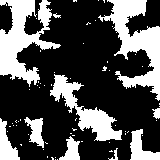

0.3055078125


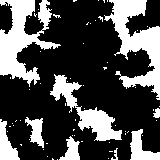

0.2928515625


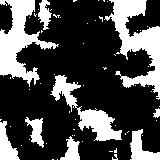

0.2800390625


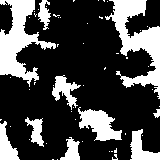

0.267734375


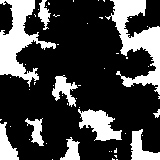

0.255234375


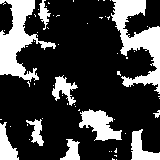

0.2440234375


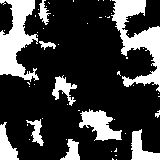

0.233359375


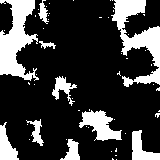

0.2221484375


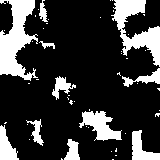

0.2123828125


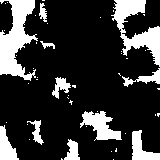

0.2027734375


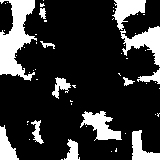

0.194453125


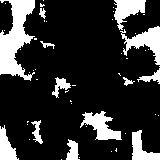

0.185625


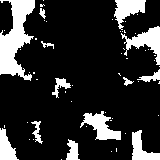

0.177265625


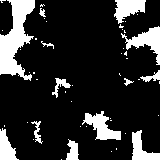

0.1694140625


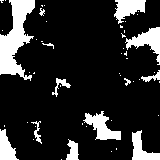

0.1617578125


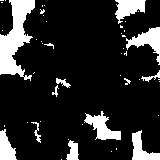

0.154453125


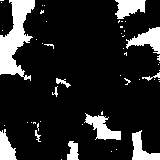

0.147890625


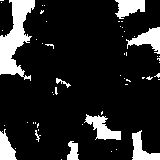

0.1419140625


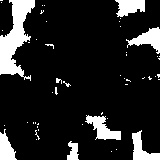

0.1359375


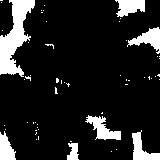

0.13125


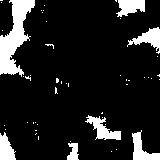

0.127265625


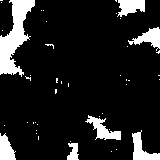

0.12234375


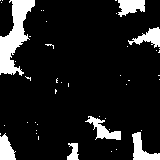

0.1177734375


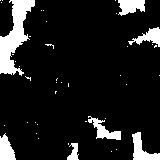

0.113046875


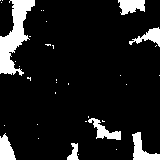

0.1094921875


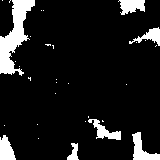

0.1060546875


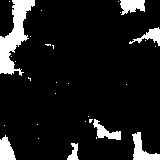

0.10234375


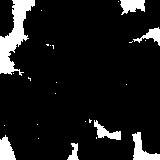

0.098828125


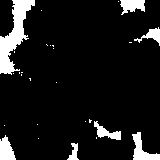

0.09578125


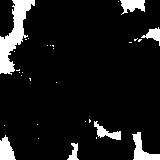

0.0925


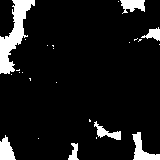

0.0896484375


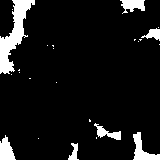

0.0862109375


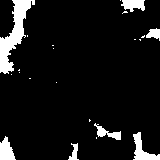

0.0831640625


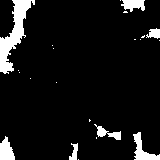

0.0798828125


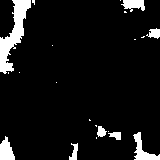

0.077578125


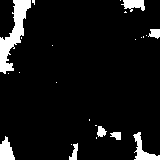

0.0755859375


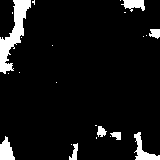

0.0730078125


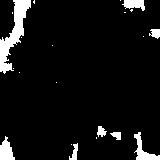

0.070703125


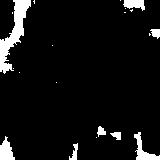

0.068125


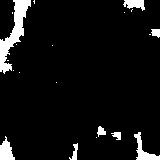

0.065390625


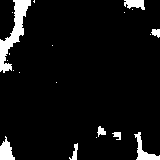

0.0629296875


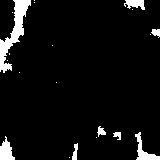

0.060390625


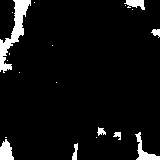

0.057890625


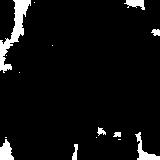

0.05578125


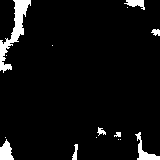

0.053515625


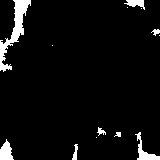

0.051171875


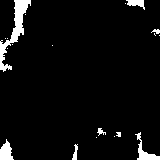

In [68]:
from random import randint
def customGrowth(probSum, numCores, superfluousPar):
    grid=torch.ones((160, 160))
    cores=[]
    coreDir=[]
    for i in range(numCores):
        x, y=randint(0, 159), randint(0, 159)
        cores.append(deque([[x, y]]))
        growthDirs=[randint(1, 100), randint(1, 100), randint(1, 100), randint(1, 100)]
        coreDir.append([probSum*(randint(1, 100)/100)*x/sum(growthDirs) for x in growthDirs])
        grid[x, y]=0

    print(cores)
    print(coreDir)

    egVol=0
    print(grid.shape)
    totVol=grid.shape[0]*grid.shape[1]
    dirs=[[0,1],[0,-1],[1,0],[-1,0]]
    iters=0
    while (totVol-egVol)/totVol>superfluousPar:
        for i in range(numCores):
            sz=len(cores[i])
            for j in range(sz):
                [coreX, coreY]=cores[i].popleft()
                flag=False
                for dir in range(4):
                    x, y=coreX+dirs[dir][0], coreY+dirs[dir][1]
                    if x<0 or x>=grid.shape[0] or y<0 or y>=grid.shape[1]:
                        continue
                    if random.random()<coreDir[i][dir] and grid[x,y]==1:
                        egVol+=1
                        cores[i].append([x, y])
                        grid[x,y]=0
                    if grid[x,y]==1:
                        flag=True
                if flag:
                    cores[i].append([coreX, coreY])
        iters+=1
        if iters%5==0:
            print((totVol-egVol)/totVol)
            display(tensorToImageTransform(grid))
    
customGrowth(0.25, 40, .05)